<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling_NLP/blob/main/Vector_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and Modules Importation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl

!pip install squarify
import squarify

!pip install wordcloud
from wordcloud import WordCloud

from numpy import dot
from numpy.linalg import norm

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Vector Similarity, 벡터의 유사도**  


---

- **Cosine Similarity, 코사인 유사도 :** 두 문서의 **코사인 각도**를 통해 계산
- **Euclidean Distance, 유클리드 거리 :** 두 문서간 **거리값**을 통해 계산
- **Jaccard Similarity, 자카드 유사도 :** 두 문서 집합에 대해 **len(교집합)/len(합집합)**을 통해 계산

## **Cosine Similarity, 코사인 유사도**

In [ ]:
## Cosine Similarity

def cos_sim(A, B):
    return dot(A, B)/(norm(A) * norm(B))

doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

print("Doc1 -- Doc2 Similarity =", cos_sim(doc1, doc2))
print("Doc2 -- Doc3 Similarity =", cos_sim(doc2, doc3))
print("Doc3 -- Doc1 Similarity =", cos_sim(doc3, doc1))

Doc1 -- Doc2 Similarity = 0.6666666666666667
Doc2 -- Doc3 Similarity = 1.0000000000000002
Doc3 -- Doc1 Similarity = 0.6666666666666667


In [ ]:
## Recommendation System with Cosine Similarity

file_root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "CAU AI Class", "data", "movies_metadata.csv")
data = pd.read_csv(file_root, low_memory=False)     # 24개의 column을 가진 45,466개의 data 존재
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
print(data.shape)
print()

data = data.head(20000)
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())   # overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print()

data['overview'] = data['overview'].fillna('')                        # 결측값을 빈 값으로 대체

tf_idf = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) =', tf_idf_matrix.shape)                    # 20000개의 row, 47847 column의 TF-IDF Matrix 생성
print()

cos_sim = cosine_similarity(tf_idf_matrix, tf_idf_matrix)             # 20000개의 문서 vector에 대해 코사인 유사도 계산
print('코사인 유사도 연산 결과 =', cos_sim.shape)
print()

title_to_index = dict(zip(data['title'], data.index))                 # key=영화 제목, value=영화 index로 구성된 딕셔너리 생성

def get_recommends(title, cos_sim=cos_sim):
    index = title_to_index[title]

    sim_scores = list(enumerate(cos_sim[index]))                        # 해당 영화와 모든 영화와의 유사도를 가져온다.

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)   # 유사도에 따라 영화들을 내림차순 정렬한다.

    sim_scores = sim_scores[1:11]                                       # 가장 유사한 10개의 영화를 받아온다.

    movie_indices = [item[0] for item in sim_scores]                    # 가장 유사한 10개의 영화의 인덱스를 얻는다.

    return data['title'].iloc[movie_indices]                            # 가장 유사한 10개의 영화의 제목을 리턴한다.

get_recommends("The Dark Knight Rises")

(45466, 24)

overview 열의 결측값의 수: 135



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TF-IDF 행렬의 크기(shape) = (20000, 47487)

코사인 유사도 연산 결과 = (20000, 20000)



12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

## **Visualization of Word Frequency**

In [ ]:
sents = data['overview'].values.tolist()

vocab = {}
preproc_sents = []
stop_words = set(stopwords.words('english'))

for sent in sents:
    tkn_sent = word_tokenize(sent)
    result = []

    for word in tkn_sent:
        word = word.lower()
        if word not in stop_words:
            if len(word) > 2:
                result.append(word)

                if word not in vocab:
                    vocab[word] = 0
                    vocab[word] += 1
    
    preproc_sents.append(result)

print(preproc_sents)
print()

all_words_list = sum(preproc_sents, [])
print(all_words_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
overview_word_count = Counter(all_words_list)                         # Counter Liabrary를 사용한 단어 빈도수 측정
print(overview_word_count)

top_overview_words = dict(overview_word_count.most_common(100))
top_overview_words

Counter({'life': 3313, 'one': 3022, 'young': 2947, 'new': 2578, 'man': 2572, 'film': 2446, 'two': 2402, 'love': 2259, 'family': 2155, 'world': 1942, 'story': 1915, 'woman': 1625, 'father': 1559, 'find': 1557, 'years': 1467, 'wife': 1379, 'get': 1363, 'time': 1362, 'finds': 1339, 'war': 1294, "n't": 1267, 'town': 1215, 'lives': 1208, 'back': 1180, 'must': 1154, 'girl': 1141, 'home': 1131, 'mother': 1123, 'friends': 1122, 'first': 1114, 'old': 1092, 'becomes': 1086, 'son': 1080, 'help': 1067, 'way': 1054, 'school': 1038, 'takes': 1010, 'three': 1009, 'daughter': 1006, '...': 985, 'friend': 985, 'take': 965, 'people': 954, 'death': 941, 'soon': 928, 'day': 913, 'also': 888, 'city': 887, 'group': 886, 'make': 885, 'set': 871, 'gets': 859, 'men': 848, 'american': 846, 'meets': 830, 'become': 827, 'husband': 805, 'together': 802, 'falls': 798, 'begins': 796, 'boy': 761, 'york': 735, 'work': 731, 'small': 730, 'goes': 721, 'tries': 710, 'best': 700, 'job': 698, 'night': 693, 'police': 693, 'h

{'life': 3313,
 'one': 3022,
 'young': 2947,
 'new': 2578,
 'man': 2572,
 'film': 2446,
 'two': 2402,
 'love': 2259,
 'family': 2155,
 'world': 1942,
 'story': 1915,
 'woman': 1625,
 'father': 1559,
 'find': 1557,
 'years': 1467,
 'wife': 1379,
 'get': 1363,
 'time': 1362,
 'finds': 1339,
 'war': 1294,
 "n't": 1267,
 'town': 1215,
 'lives': 1208,
 'back': 1180,
 'must': 1154,
 'girl': 1141,
 'home': 1131,
 'mother': 1123,
 'friends': 1122,
 'first': 1114,
 'old': 1092,
 'becomes': 1086,
 'son': 1080,
 'help': 1067,
 'way': 1054,
 'school': 1038,
 'takes': 1010,
 'three': 1009,
 'daughter': 1006,
 '...': 985,
 'friend': 985,
 'take': 965,
 'people': 954,
 'death': 941,
 'soon': 928,
 'day': 913,
 'also': 888,
 'city': 887,
 'group': 886,
 'make': 885,
 'set': 871,
 'gets': 859,
 'men': 848,
 'american': 846,
 'meets': 830,
 'become': 827,
 'husband': 805,
 'together': 802,
 'falls': 798,
 'begins': 796,
 'boy': 761,
 'york': 735,
 'work': 731,
 'small': 730,
 'goes': 721,
 'tries': 710,

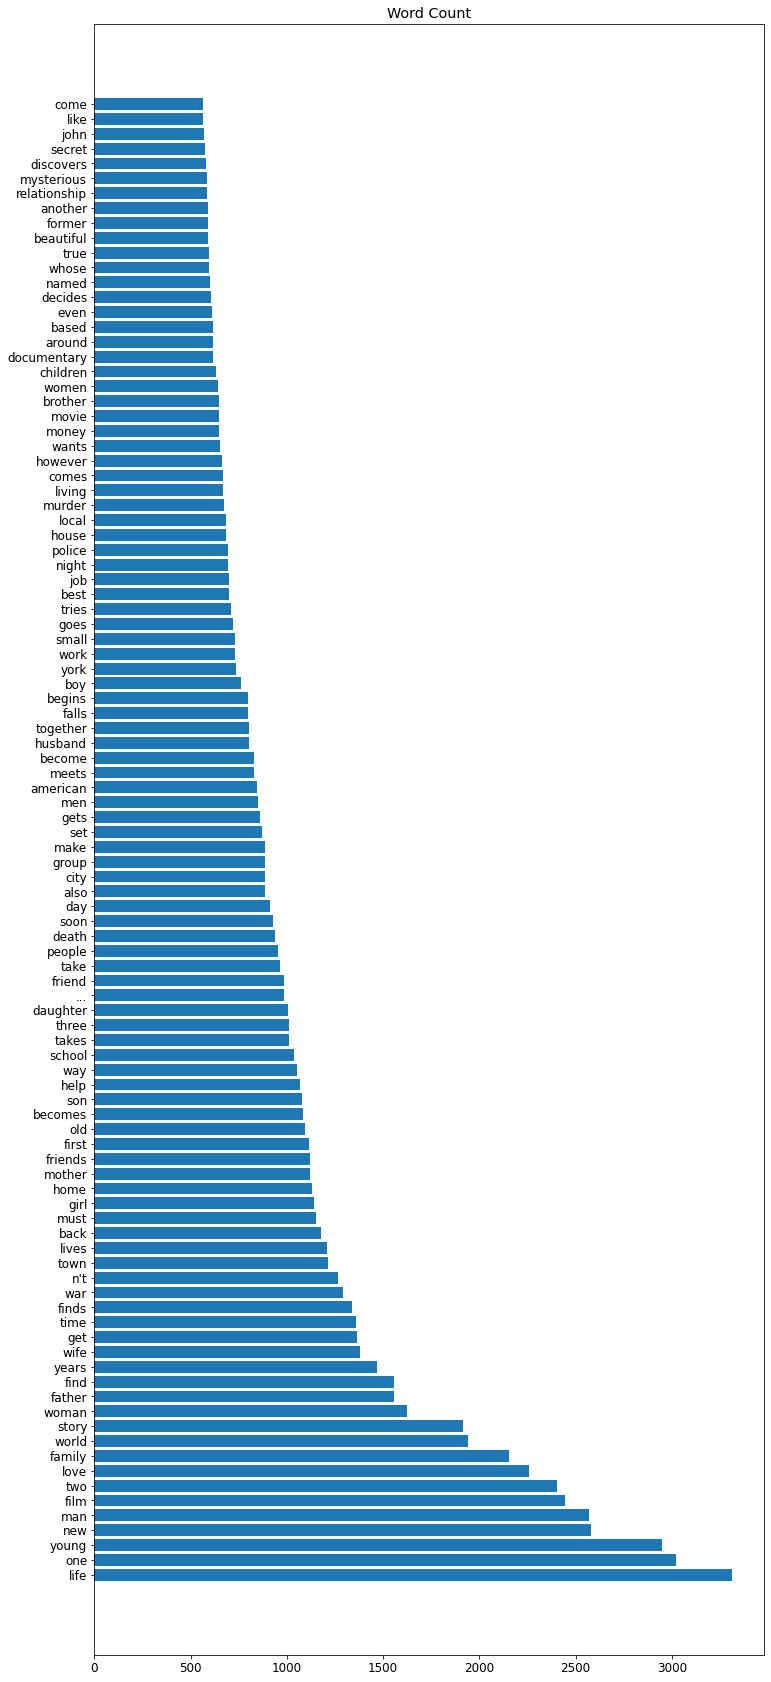

In [ ]:
plt.rcParams['font.size'] = 12                          # Horizontal Bar를 활용한 단어 빈도수 시각화
y_pos = np.arange(len(top_overview_words))

plt.figure(figsize=(12,30))
plt.barh(y_pos, top_overview_words.values())
plt.title('Word Count')
plt.yticks(y_pos, top_overview_words.keys())
plt.show()

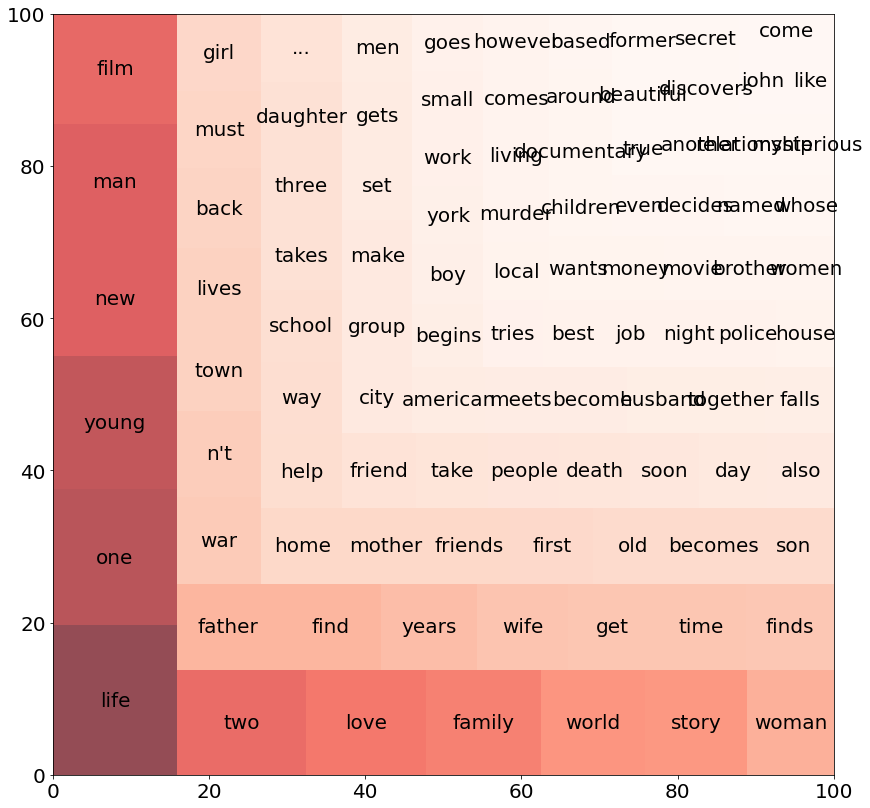

In [ ]:
plt.rcParams['figure.figsize'] = (14,14)                                        # Squarify를 사용한 단어 빈도수 시각화
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_overview_words.values()),
                            vmax=max(top_overview_words.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_overview_words.values()]

squarify.plot(label=top_overview_words.keys(),
              sizes=top_overview_words.values(),
              color=colors,
              alpha=.7)

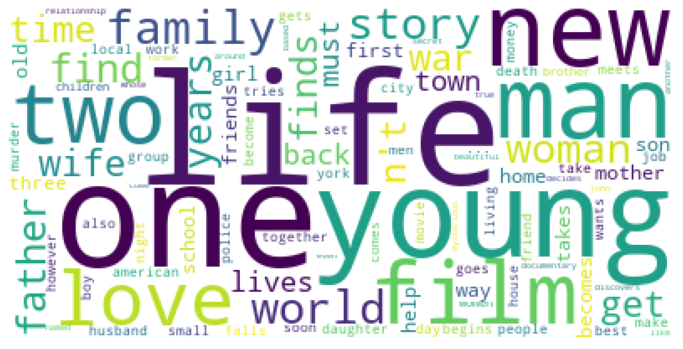

In [ ]:
wc = WordCloud(background_color='white')                        # WordCloud를 이용한 단어 빈도수 시각화
wc.generate_from_frequencies(top_overview_words)

figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()